In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
sys.path.append('/Applications/OpenFUSIONToolkit/python')
# tokamaker_python_path = os.getenv('OFT_ROOTPATH')
# if tokamaker_python_path is not None:
#     sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

In [6]:
with open('example/DIIID_geom.json','r') as fid:
    DIIID_geom = json.load(fid)

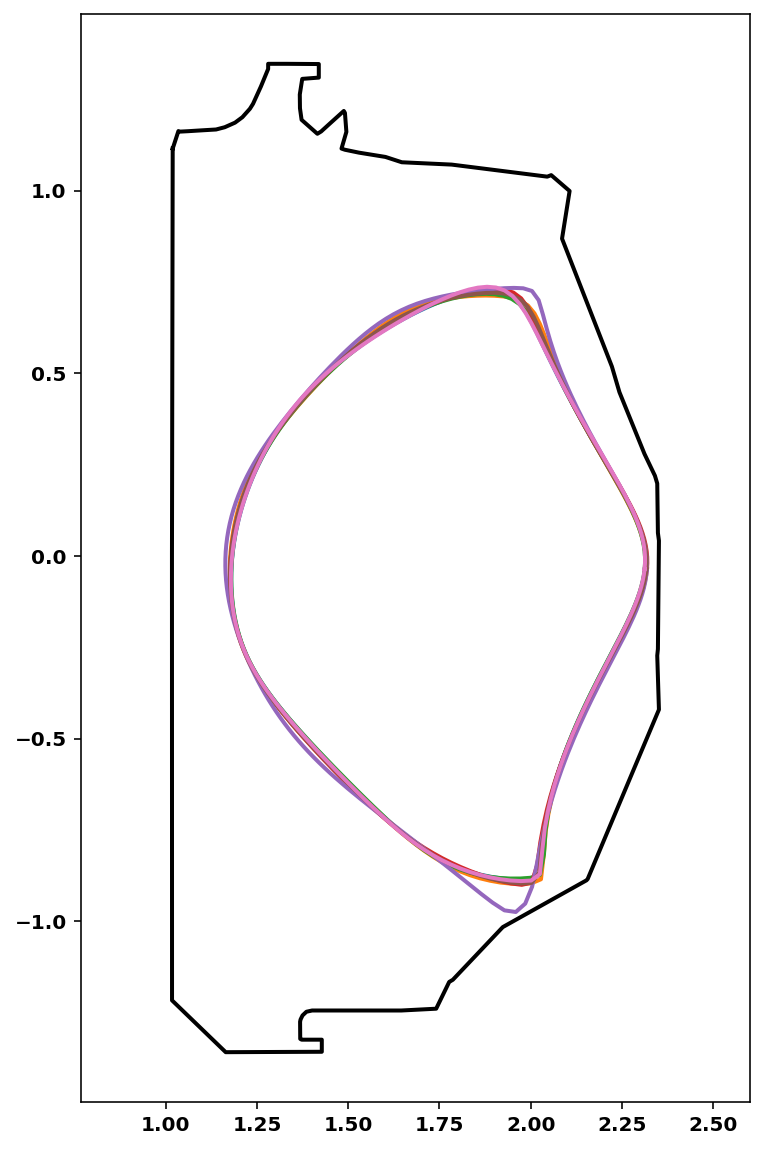

In [11]:
# Make the figure
plt.figure(figsize = (6,10))
ax = plt.subplot(111)
ax.axis('equal')

# Plot the limiter
lim = np.array(DIIID_geom['limiter'])
plt.plot(np.hstack((lim[:,0],lim[0,0])), np.hstack((lim[:,1],lim[0,1])), c='k')

# Plot the results
for eqdsk_name in [x for x in os.listdir('gEQDSKs') if 'F9' in x]:
    eqdsk = read_eqdsk(f'gEQDSKs/{eqdsk_name}')
    bndry = eqdsk['rzout'].copy()
    plt.plot(bndry[:,0], bndry[:,1])